In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv('/kaggle/input/building-permit-applications-data/Building_Permits.csv')
df


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/kickstarter-projects/ks-projects-201801.csv
/kaggle/input/kickstarter-projects/ks-projects-201612.csv
/kaggle/input/building-permit-applications-data/Building_Permits.csv
/kaggle/input/building-permit-applications-data/DataDictionaryBuildingPermit.xlsx


/tmp/ipykernel_20/1238460766.py:24: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/building-permit-applications-data/Building_Permits.csv')


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,NaN,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,NaN,Indiana,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,NaN,Sutter,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [2]:
#Missiing data count
missing_value_count = df.isnull().sum()
missing_value_count[:]

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [3]:
#what % of data is missing
total_cells = np.product(df.shape)
total_missing=missing_value_count.sum()
percentage_missing =(total_missing / total_cells)*100
percentage_missing


26.26002315058403

In [4]:
# remove all the rows that contain a missing value
df.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


In [5]:
# remove all columns with at least one missing value
columns_with_na_dropped = df.dropna(axis = 1)
columns_with_na_dropped.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [6]:
#data lost 
print(f"cloumns_in the original_dataset = {df.shape[1]}")
print(f"columns after dropping missing data values = {columns_with_na_dropped.shape[1]}")

cloumns_in the original_dataset = 43
columns after dropping missing data values = 12


In [7]:
#Removing all the rows or Coumns with missing value data we finally get same data that is after removing the empty data columns
new_data = columns_with_na_dropped


In [8]:
# filling in missing values {only dealing with a small subset of data for faster rum for now}
data_subset = df.loc[:,'Issued Date':'Fire Only Permit']
data_subset


,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit
0,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN
1,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN
3,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN
4,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
198895,12/05/2017,NaN,12/05/2017,NaN,NaN,NaN,NaN,NaN
198896,12/06/2017,NaN,12/06/2017,NaN,4.0,4.0,NaN,Y
198897,12/06/2017,NaN,12/06/2017,NaN,NaN,NaN,NaN,NaN
198898,12/06/2017,NaN,12/06/2017,NaN,NaN,NaN,NaN,NaN


In [9]:
data_subset.fillna(0)

,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit
0,11/09/2015,0,11/09/2015,0,6.0,0.0,0,0
1,08/03/2017,0,08/03/2017,0,7.0,0.0,0,0
2,0,0,0,0,6.0,6.0,0,0
3,07/18/2017,07/24/2017,07/18/2017,0,2.0,2.0,0,0
4,12/01/2017,0,11/20/2017,0,3.0,0.0,0,0
...,...,...,...,...,...,...,...,...
198895,12/05/2017,0,12/05/2017,0,0.0,0.0,0,0
198896,12/06/2017,0,12/06/2017,0,4.0,4.0,0,Y
198897,12/06/2017,0,12/06/2017,0,0.0,0.0,0,0
198898,12/06/2017,0,12/06/2017,0,0.0,0.0,0,0


In [10]:
# replace all NA's the value that comes directly after it in the same column, 
data_subset.fillna(method = 'bfill', axis=0).fillna(0)

,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit
0,11/09/2015,07/24/2017,11/09/2015,Y,6.0,6.0,Y,Y
1,08/03/2017,07/24/2017,08/03/2017,Y,7.0,6.0,Y,Y
2,07/18/2017,07/24/2017,07/18/2017,Y,6.0,6.0,Y,Y
3,07/18/2017,07/24/2017,07/18/2017,Y,2.0,2.0,Y,Y
4,12/01/2017,07/12/2017,11/20/2017,Y,3.0,5.0,Y,Y
...,...,...,...,...,...,...,...,...
198895,12/05/2017,0,12/05/2017,0,4.0,4.0,0,Y
198896,12/06/2017,0,12/06/2017,0,4.0,4.0,0,Y
198897,12/06/2017,0,12/06/2017,0,0.0,0.0,0,0
198898,12/06/2017,0,12/06/2017,0,0.0,0.0,0,0


In [11]:
# Scale and Normalize Data
data = pd.read_csv("/kaggle/input/kickstarter-projects/ks-projects-201801.csv")
data.isnull().sum()
# np.product(data.shape)


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

/tmp/ipykernel_20/1968561946.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
/tmp/ipykernel_20/1968561946.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data, ax=ax[1])


Text(0.5, 1.0, 'Scaled data')

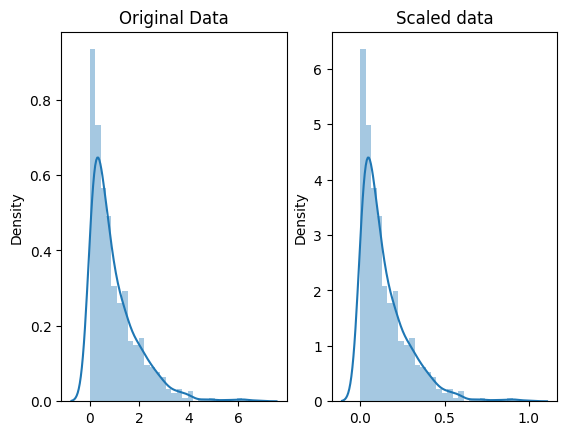

In [12]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)
original_data
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])
scaled_data
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

/tmp/ipykernel_20/2353335585.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, ax=ax[0])
/tmp/ipykernel_20/2353335585.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_data[0], ax=ax[1])


Text(0.5, 1.0, 'Normalized data')

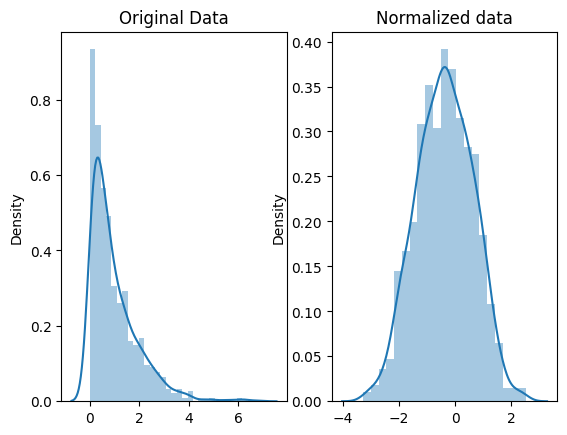

In [13]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")